## 1. Package Load

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

from datetime import date
%matplotlib inline

## 2. Data Load

In [2]:
var_list = ['FEDFUNDS', 'GS1M', 'GS3M', 'GS6M', 'GS1',
            'GS2', 'GS5', 'GS10', 'GS30', 'AAA', 'BAA']
start = date(2001,7,1)
end = date(2019,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
print(df.head())
print(df.tail())

            FEDFUNDS  GS1M  GS3M  GS6M   GS1   GS2   GS5  GS10  GS30   AAA  \
DATE                                                                         
2001-07-01      3.77  3.67  3.59  3.56  3.62  4.04  4.76  5.24  5.61  7.13   
2001-08-01      3.65  3.53  3.44  3.39  3.47  3.76  4.57  4.97  5.48  7.02   
2001-09-01      3.07  2.68  2.69  2.71  2.82  3.12  4.12  4.73  5.48  7.17   
2001-10-01      2.49  2.27  2.20  2.17  2.33  2.73  3.91  4.57  5.32  7.03   
2001-11-01      2.09  1.99  1.91  1.92  2.18  2.78  3.97  4.65  5.12  6.97   

             BAA  
DATE              
2001-07-01  7.97  
2001-08-01  7.85  
2001-09-01  8.03  
2001-10-01  7.91  
2001-11-01  7.81  
            FEDFUNDS  GS1M  GS3M  GS6M   GS1   GS2   GS5  GS10  GS30   AAA  \
DATE                                                                         
2019-08-01      2.13  2.07  1.99  1.93  1.77  1.57  1.49  1.63  2.12  2.98   
2019-09-01      2.04  1.99  1.93  1.89  1.80  1.65  1.57  1.70  2.16  3.03   
2019-10-

1. Practicing **Dimension Reduction** using **US Treasury Bond Rates**.

## 3. Checking

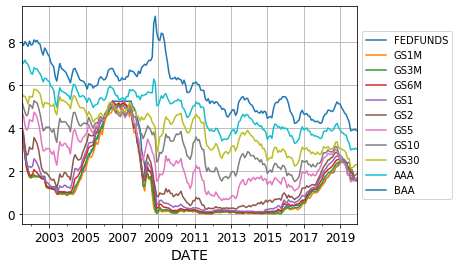

In [3]:
df.plot()
plt.grid(True)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

1. There are so many lines in one graph. We can consider summarizing it.

## 4. Correlation Matrix

In [4]:
mat_corr = df.corr()
print(mat_corr)

          FEDFUNDS      GS1M      GS3M      GS6M       GS1       GS2  \
FEDFUNDS  1.000000  0.990693  0.990874  0.988774  0.979977  0.949230   
GS1M      0.990693  1.000000  0.998365  0.993637  0.986293  0.959563   
GS3M      0.990874  0.998365  1.000000  0.997865  0.992022  0.966601   
GS6M      0.988774  0.993637  0.997865  1.000000  0.997001  0.974479   
GS1       0.979977  0.986293  0.992022  0.997001  1.000000  0.987842   
GS2       0.949230  0.959563  0.966601  0.974479  0.987842  1.000000   
GS5       0.835878  0.843986  0.849755  0.858995  0.886448  0.940452   
GS10      0.672717  0.673289  0.676975  0.685676  0.717774  0.792352   
GS30      0.459445  0.456108  0.455823  0.460099  0.492536  0.578005   
AAA       0.419324  0.406662  0.405940  0.414640  0.450526  0.539279   
BAA       0.288089  0.268763  0.268892  0.283672  0.319080  0.399225   

               GS5      GS10      GS30       AAA       BAA  
FEDFUNDS  0.835878  0.672717  0.459445  0.419324  0.288089  
GS1M      0.8

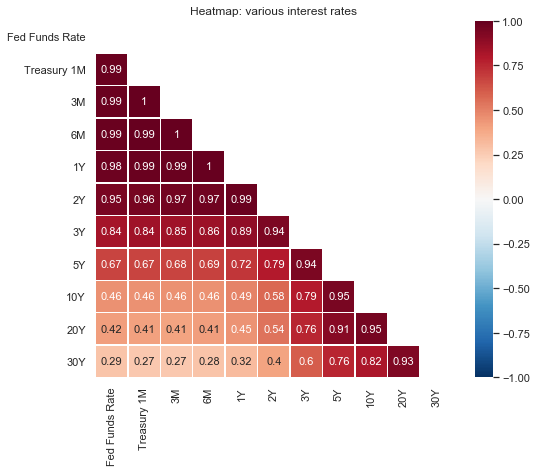

In [5]:
sns.set(style = "white")

mask = np.zeros_like(mat_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = "RdBu_r"

xticks = np.array(["Fed Funds Rate", "Treasury 1M", "3M", "6M",
                   "1Y", "2Y", "3Y", "5Y", "10Y", "20Y", "30Y"])
yticks = np.array(["Fed Funds Rate", "Treasury 1M", "3M", "6M",
                   "1Y", "2Y", "3Y", "5Y", "10Y", "20Y", "30Y"])

plt.figure(figsize = (8 ,8))

sns.heatmap(mat_corr, mask = mask, cmap = cmap, xticklabels = xticks,
            yticklabels = yticks, square = True,
            linewidths = .5, annot = True, annot_kws = {"size" : 11}, 
            vmax = 1, vmin = -1, cbar_kws = {"shrink" : .82})

plt.yticks(rotation = 0) 
plt.title("Heatmap: various interest rates")
plt.show()

1. We can find that lots of values are correlated.
2. For examples, **6M** is correlated with **Treasury 1M** with **0.99** and **3M** is correlated with **1Y** with **0.99**.

## 5. Data Preprocessing

In [6]:
print("Is there any missing obs?", df.isnull().values.any())
print(df.isnull().sum())

Is there any missing obs? False
FEDFUNDS    0
GS1M        0
GS3M        0
GS6M        0
GS1         0
GS2         0
GS5         0
GS10        0
GS30        0
AAA         0
BAA         0
dtype: int64


1. There are no missing values in our data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2001-07-01 to 2019-12-01
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEDFUNDS  222 non-null    float64
 1   GS1M      222 non-null    float64
 2   GS3M      222 non-null    float64
 3   GS6M      222 non-null    float64
 4   GS1       222 non-null    float64
 5   GS2       222 non-null    float64
 6   GS5       222 non-null    float64
 7   GS10      222 non-null    float64
 8   GS30      222 non-null    float64
 9   AAA       222 non-null    float64
 10  BAA       222 non-null    float64
dtypes: float64(11)
memory usage: 20.8 KB


## 6. Principle Component Analysis

In [8]:
from sklearn.decomposition import PCA

pca_test = PCA()
PCs_test = pca_test.fit_transform(df)

In [9]:
print('The amount of variance explained by each of the selected components:')
pca_test.explained_variance_

The amount of variance explained by each of the selected components:


array([1.61377943e+01, 3.02231583e+00, 2.81435336e-01, 1.34903481e-01,
       2.57218413e-02, 1.76660566e-02, 1.19345354e-02, 5.10912663e-03,
       1.46303682e-03, 8.72453845e-04, 3.20433149e-04])

In [10]:
print('Percentage of variance explained by each of the selected components')
pca_test.explained_variance_ratio_

Percentage of variance explained by each of the selected components


array([8.21699350e-01, 1.53889366e-01, 1.43300396e-02, 6.86897477e-03,
       1.30969696e-03, 8.99514948e-04, 6.07679079e-04, 2.60144970e-04,
       7.44944681e-05, 4.44233420e-05, 1.63157185e-05])

1. **Orthogonal transformation**, in **PCA**, is used to transform samples in a high-dimensional space that are likely to be related to each other into a sample in a **low-dimensional space** (main component) that has no linear relationship.

## 7. n_components = 2

In [11]:
pca = PCA(n_components = 2)
PCs = pca.fit_transform(df)

In [12]:
print('Variance explained:', pca.explained_variance_)
print('Ratio explained:', pca.explained_variance_ratio_)

Variance explained: [16.13779435  3.02231583]
Ratio explained: [0.82169935 0.15388937]


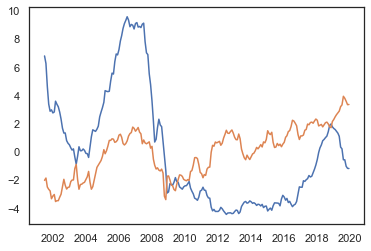

In [13]:
PCs_index = df.index

PCs.reshape(len(PCs),-1)
df_PCs = pd.DataFrame(PCs, index = PCs_index)

plt.plot(df_PCs)

1. Restricing n_components = 2, then we can draw a graph reduced to two components.

## 8. n_componets = 3

In [14]:
pca = PCA(n_components = 3)
PCs = pca.fit_transform(df)

In [15]:
print('Variance explained:', pca.explained_variance_)
print('Raion explained:', pca.explained_variance_ratio_)

Variance explained: [16.13779435  3.02231583  0.28143534]
Raion explained: [0.82169935 0.15388937 0.01433004]


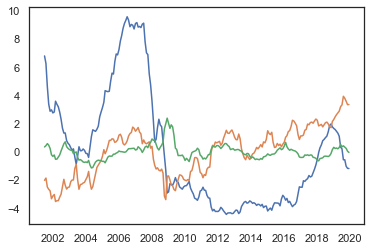

In [16]:
PCs_index = df.index

PCs.reshape(len(PCs),-1)
df_PCs = pd.DataFrame(PCs, index = PCs_index)

plt.plot(df_PCs)

1. Restricing n_components = 3, then we can draw a graph reduced to three components.
2. As you can see, graph is litte bit more complex.

## 9. Reference
1. There is another way to Demension Reduction which is **Singular Vector Decomposion with numpy**, not just simply using **PCA** module.
2. We can refer to following link. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8